<a href="https://colab.research.google.com/github/3B032070/2025_ML_hws/blob/main/%E3%80%8Chw4_1_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1


1. 資料預處理

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


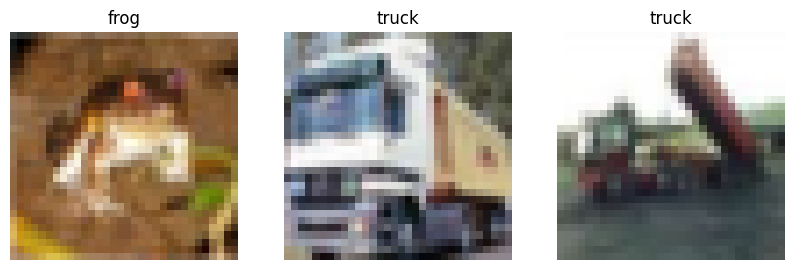

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# 載入資料
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 顯示形狀
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# 將 label 轉成 one-hot
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

# 標籤名稱 (p.2-81)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 顯示 3 張訓練圖片與標籤
plt.figure(figsize=(10, 3))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

# 資料標準化
x_train = x_train / 255.0
x_test = x_test / 255.0


2. 建立 CNN 模型

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Layer 1: Conv2D
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# Params = (3*3*3 + 1)*32 = 896

# Layer 2: MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3: Conv2D
model.add(Conv2D(64, (3, 3), activation='relu'))
# Params = (3*3*32 + 1)*64 = 18496

# Layer 4: MaxPooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 5: Flatten
model.add(Flatten())

# Layer 6: Dense
model.add(Dense(128, activation='relu'))
# Params = 64*6*6 = 2304 → (2304+1)*128 = 295040

# Layer 7: Output
model.add(Dense(10, activation='softmax'))
# Params = (128+1)*10 = 1290

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

3. 訓練模型

In [ ]:
3. # 20% 驗證資料
x_val = x_train[:10000]
x_train_new = x_train[10000:]
y_val = y_train_cat[:10000]
y_train_new = y_train_cat[10000:]

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train_new, y_train_new,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val))


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 67s 207ms/step - accuracy: 0.3374 - loss: 1.8449 - val_accuracy: 0.5249 - val_loss: 1.3232
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 89s 229ms/step - accuracy: 0.5455 - loss: 1.2864 - val_accuracy: 0.5930 - val_loss: 1.1688
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 64s 170ms/step - accuracy: 0.5993 - loss: 1.1530 - val_accuracy: 0.6214 - val_loss: 1.0845
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 52s 167ms/step - accuracy: 0.6383 - loss: 1.0492 - val_accuracy: 0.6454 - val_loss: 1.0154
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 78s 156ms/step - accuracy: 0.6648 - loss: 0.9682 - val_accuracy: 0.6545 - val_loss: 0.9874
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 53s 170ms/step - accuracy: 0.6825 - loss: 0.9195 - val_accuracy: 0.6713 - val_loss: 0.9500
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 78s 156ms/step - accuracy: 0.7060 - loss: 0.8564 - val_accuracy: 0.6770 - val_loss: 0.9302
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 164ms/step - accuracy: 0.7237 - loss: 0

4. 顯示 loss 與 accuracy 圖表

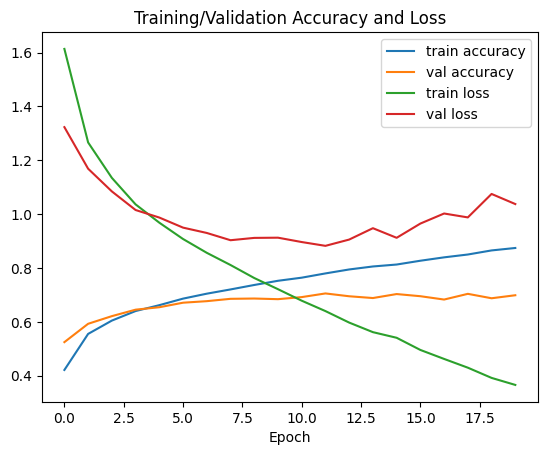

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Training/Validation Accuracy and Loss")
plt.xlabel("Epoch")
plt.show()


5. 模型準確率 & 混淆矩陣

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6944 - loss: 1.0516
Test Accuracy: 0.6932
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


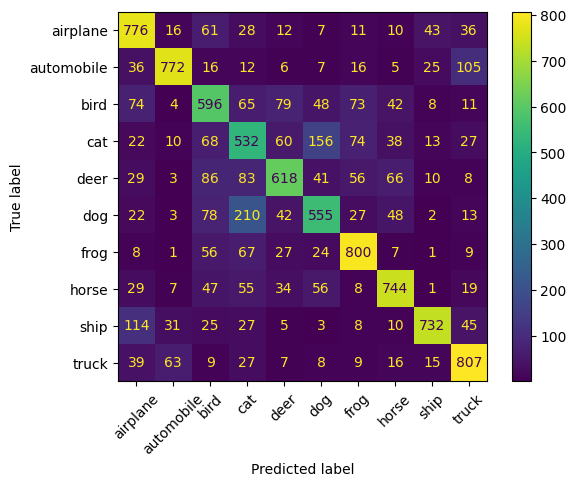

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")

# 混淆矩陣
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(xticks_rotation=45)
plt.show()


6. 顯示預測與實際標籤

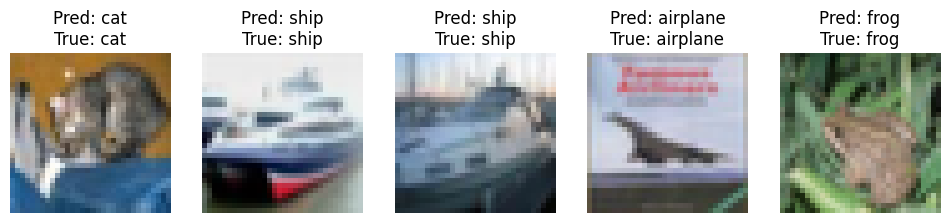

In [ ]:
# 顯示 5 張預測結果
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[y_pred_classes[i]]}\nTrue: {class_names[y_true[i]]}")
    plt.axis('off')
plt.show()


In [ ]:
model.save('hw4-1.keras')


# 7. interact_manual 功能（p.2-81）

In [ ]:
from ipywidgets import interact_manual

def predict_image(index):
    img = x_test[index]
    plt.imshow(img)
    plt.axis('off')
    pred = model.predict(img.reshape(1, 32, 32, 3))
    pred_label = class_names[np.argmax(pred)]
    true_label = class_names[y_test[index][0]]
    print(f"預測: {pred_label}, 真實: {true_label}")

interact_manual(predict_image, index=(0, len(x_test)-1))


interactive(children=(IntSlider(value=4999, description='index', max=9999), Button(description='Run Interact',…

<function __main__.predict_image(index)>